# **Istallazione librerie e Importazione file input**

In [8]:

%pip install pandas openpyxl
%pip install transformers
%pip install llama-cpp-python
%pip install tqdm
%pip install seaborn
%pip install torch 
%pip install selenium beautifulsoup4 pandas tqdm
%pip install webdriver_manager
%pip install sacremoses
%pip install ipywidgets

import pandas as pd
df_data = pd.read_excel("https://github.com/sentinel747/Applciation_AIB/raw/refs/heads/main/DataInputCRMExraction.xlsx")
df_context = pd.read_excel("https://github.com/sentinel747/Applciation_AIB/raw/refs/heads/main/ContextInputCategories.xlsx")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 12.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:

df_data.head()

,Contact Name,Contact E-mail,Contact Job Title,Company / Account
0,xxxxxxx,xxxxxxxx@lagardere-tr.es,Customs Manager fashion&luxury,Lagardere
1,xxxxxxx,xxxxxxxx@ahorramas.es,Directora de Seguridad,Ahorramas
2,xxxxxxx,xxxxxxxx@asava.es,Responsable de compras y dirección de obras,ASAVA
3,xxxxxxx,xxxxxxxx@merlinprop.com,Responsable Gestión Centros Comerciales,Merlin Properties
4,xxxxxxx,xxxxxxxx@cepsa.com,Director Seguridad,Cepsa


In [3]:
df_context.head()

,#,Player,Can they buy the solution?,Can they influence the buying decision?,Is Target,Notes
0,1,Specifiers,NO,YES,YES,Specifiers indicate which is the solution to u...
1,2,Architect,NO,YES,YES,A specific kind of specifier focusing on the b...
2,3,General contractors (GC),YES,YES,YES,On a new construction (green-field) or deep re...
3,4,Brokers,NO,NO,no,These companies are in charge of finding buyer...
4,5,Tenants,YES,YES,YES,These players are in charge of selecting the t...


# **Pulizia data files**

# ***1**. Crm Data*

In [4]:
import numpy as np
import requests
import pandas as pd
from tqdm import tqdm  
from pathlib import Path

# Rimozione delle colonne inutili
df_data_cleaned = df_data.drop(columns=["Contact Name", "Contact Job Title"])

# Rimozione di duplicati e valori mancanti
df_data_cleaned = df_data_cleaned.drop_duplicates()
df_data_cleaned = df_data_cleaned.dropna()

# Estrazione del dominio dall'email
tqdm.pandas(desc="Estrazione domini")
df_data_cleaned['Email Domain'] = df_data_cleaned['Contact E-mail'].progress_apply(lambda email: email.split('@')[-1])

# Rimozione dei domini pubblici
public_domains = ['gmail.com', 'hotmail.com', 'yahoo.com', 'outlook.com', 'live.com', 'icloud.com', 'unknown.com','me.com']
df_data_cleaned = df_data_cleaned[~df_data_cleaned['Email Domain'].isin(public_domains)]

# Verifica dell'esistenza dei domini
def check_domain_exists(domain):
    try:
        response = requests.get(f"http://{domain}", timeout=2)
        return response.status_code == 200
    except requests.RequestException:
        return False
    
def save_to_downloads(df, filename="df_data_cleaned.xlsx"):
    downloads_path = Path.home() / "Downloads" 
    file_path = downloads_path / filename
    df.to_excel(file_path, index=False)
    print(f"File salvato in: {file_path}")

tqdm.pandas(desc="Verifica dei domini")
df_data_cleaned['Domain Exists'] = df_data_cleaned['Email Domain'].progress_apply(check_domain_exists)
df_data_cleaned = df_data_cleaned[df_data_cleaned['Domain Exists']]
df_data_cleaned = df_data_cleaned.drop(columns=['Domain Exists'])  

# Estrazione del nome principale del dominio (ad es., "savills" da "savills.es" e "savills.pt")
df_data_cleaned['Main Domain Name'] = df_data_cleaned['Email Domain'].apply(lambda domain: domain.split('.')[0])

# Rimozione dei duplicati basati sul nome principale del dominio mantenendo la prima occorrenza del dominio completo
df_data_cleaned = df_data_cleaned.drop_duplicates(subset=["Main Domain Name"])

# Rimozione della colonna temporanea "Main Domain Name"
df_data_cleaned = df_data_cleaned.drop(columns=['Main Domain Name'])

# Rimozione dei duplicati finali su "Contact E-mail" e "Email Domain"
df_data_cleaned = df_data_cleaned.drop_duplicates(subset=["Contact E-mail"])
df_data_cleaned = df_data_cleaned.drop_duplicates(subset=["Email Domain"])

# Salvataggio del risultato finale
save_to_downloads(df_data_cleaned, "df_data_cleaned.xlsx")

df_data_cleaned


Verifica dei domini: 100%|██████████| 165/165 [03:19<00:00,  1.21s/it]


File salvato in: C:\Users\Andrea\Downloads\df_data_cleaned.xlsx


,Contact E-mail,Company / Account,Email Domain
0,xxxxxxxx@lagardere-tr.es,Lagardere,lagardere-tr.es
2,xxxxxxxx@asava.es,ASAVA,asava.es
4,xxxxxxxx@cepsa.com,Cepsa,cepsa.com
7,xxxxxxxx@nhood.com,NHOOD,nhood.com
8,xxxxxxxx@grupoyoungretail.com,Young Retail,grupoyoungretail.com
9,xxxxxxxx@lacasadelascarcasas.es,La Casa de las Carcasas,lacasadelascarcasas.es
10,xxxxxxxx@grupolar.com,Grupo Lar,grupolar.com
11,xxxxxxxx@dazia.com,Dazia Capital,dazia.com
12,xxxxxxxx@cmarsl.com,Ferromave,cmarsl.com
13,xxxxxxxx@monoma.eu,Monoma,monoma.eu


# ***2**. Crm context*

In [5]:
import numpy as np
from pathlib import Path

def clean_categories(df):

    df_cleaned = df.drop_duplicates().dropna()
    df_cleaned = df_cleaned.drop(columns=['Can they buy the solution?', 'Can they influence the buying decision?'])

    return df_cleaned

def save_to_downloads(df, filename):
    downloads_path = Path.home() / "Downloads" 
    file_path = downloads_path / filename
    df.to_excel(file_path, index=False)
    print(f"File salvato in: {file_path}")

df_context_cleaned = clean_categories(df_context)

save_to_downloads(df_context_cleaned, "df_context_cleaned.xlsx")
df_context_cleaned.head()




File salvato in: C:\Users\Andrea\Downloads\df_context_cleaned.xlsx


,#,Player,Is Target,Notes
0,1,Specifiers,YES,Specifiers indicate which is the solution to u...
1,2,Architect,YES,A specific kind of specifier focusing on the b...
2,3,General contractors (GC),YES,On a new construction (green-field) or deep re...
3,4,Brokers,no,These companies are in charge of finding buyer...
4,5,Tenants,YES,These players are in charge of selecting the t...


# **Ricerca delle infomrazioni delle aziende, deduzione e traduzione a inglese**

# ***1**. Meta informazioni*

In [11]:
import requests
from bs4 import BeautifulSoup  # type: ignore
import pandas as pd
from tqdm import tqdm  
from transformers import pipeline
from pathlib import Path

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-mul-en", device=0)  # Modello per tradurre in inglese

def remove_duplicates(description_parts):
    seen = set()
    unique_parts = []
    for part in description_parts:
        if part not in seen:
            unique_parts.append(part)
            seen.add(part)
    return unique_parts

# Funzione migliorata per estrarre più informazioni dai meta tag e dai paragrafi <p>
def extract_meta_information(soup):
    info = {}

    # Estrarre meta description
    description = soup.find('meta', attrs={'name': 'description'})
    if description:
        info['meta_description'] = description.get('content', '')

    # Estrarre og:description (usato spesso per social e anteprime)
    og_description = soup.find('meta', attrs={'property': 'og:description'})
    if og_description:
        info['og_description'] = og_description.get('content', '')

    # Estrarre meta keywords (se disponibili)
    keywords = soup.find('meta', attrs={'name': 'keywords'})
    if keywords:
        info['meta_keywords'] = keywords.get('content', '')

    # Estrarre og:title (utilizzato per anteprime sui social)
    og_title = soup.find('meta', attrs={'property': 'og:title'})
    if og_title:
        info['og_title'] = og_title.get('content', '')

    paragraphs = soup.find_all('p')
    if paragraphs:
        # estrazione a un massimo di 7 paragrafi
        paragraph_text = " ".join([p.get_text().strip() for p in paragraphs[:7] if p.get_text().strip()])
        info['paragraphs'] = paragraph_text

    return info

# Funzione per estrarre informazioni dal sito web
def extract_company_info(url):
    try:
        response = requests.get(url, timeout=10)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # estrazione
            meta_info = extract_meta_information(soup)
        
            description_parts = []

            if 'meta_description' in meta_info:
                description_parts.append(meta_info['meta_description'])
            if 'og_description' in meta_info:
                description_parts.append(meta_info['og_description'])
            if 'paragraphs' in meta_info:
                description_parts.append(meta_info['paragraphs'])

            unique_description_parts = remove_duplicates(description_parts)

            full_description = " ".join(unique_description_parts)
            return full_description[:500]  
        else:
            return "Company information not available."
    except Exception as e:
        return "Company information not available."

# Funzione per tradurre in inglese e rimuovere l'avviso di clean_up_tokenization_spaces
def translate_to_english(text):
    try:
        translation = translator(text, max_length=500, clean_up_tokenization_spaces=True)  # Parametro aggiunto
        return translation[0]['translation_text']
    except Exception as e:
        return text

# Funzione per creare il link del sito web a partire dal dominio email
def construct_website_url(domain):
    return f"http://{domain}"

def add_description_column(df):
    descriptions = []
    
    for domain in tqdm(df['Email Domain'], desc="Estrazione informazioni", unit="azienda"):
        website_url = construct_website_url(domain)
        web_description = extract_company_info(website_url)
        translated_description = translate_to_english(web_description)
        descriptions.append(translated_description)

    df['Description'] = descriptions  
    return df

def save_to_downloads(df, filename):
    downloads_path = Path.home() / "Downloads"  
    file_path = downloads_path / filename
    df.to_excel(file_path, index=False)
    print(f"File salvato in: {file_path}")

# Applicazione della funzione e salvataggio
df_data_with_description = add_description_column(df_data_cleaned)
save_to_downloads(df_data_with_description, "df_data_with_description.xlsx")

df_data_with_description.head()


c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Estrazione informazioni: 100%|██████████| 89/89 [03:00<00:00,  2.03s/azienda]

File salvato in: C:\Users\Andrea\Downloads\df_data_with_description.xlsx


,Contact E-mail,Company / Account,Email Domain,Description
0,xxxxxxxx@lagardere-tr.es,Lagardere,lagardere-tr.es,Lagardère Travel Retail is one of the four bus...
2,xxxxxxxx@asava.es,ASAVA,asava.es,ASAVA is a company specializing in the compreh...
4,xxxxxxxx@cepsa.com,Cepsa,cepsa.com,We want to guarantee the energy of today while...
7,xxxxxxxx@nhood.com,NHOOD,nhood.com,Noood Do you want to know more? Inauguration o...
8,xxxxxxxx@grupoyoungretail.com,Young Retail,grupoyoungretail.com,By increasing the brands of the retail sector:...


# ***2**. Deduzione ed unione*

# Tramite modello Llama3.2 1B (3B non permette dowload)

In [14]:
import pandas as pd
from tqdm import tqdm  # Importa tqdm per la barra di avanzamento
from llama_cpp import Llama
from pathlib import Path

# Inizializzazione del modello LLama 3.2 Instruct 1B Bartowski con il percorso corretto e seed fisso
llm = Llama(model_path="C:/Users/Andrea/.cache/lm-studio/models/bartowski/Llama-3.2-1B-Instruct-GGUF/Llama-3.2-1B-Instruct-Q4_0.gguf", device=0)

# Funzione per dedurre l'attività aziendale basata sul dominio con il modello LLama
def deduce_company_activity(domain, description):
    try:
        base_prompt = "You are an expert business analyst. Your role is to analyze the information provided and predict the business activity of a company based on its domain and description. Answer with a short sentence regarding the company activity and do not use bullet points."
        prompt = f"{base_prompt}\n\nDomain: {domain}\nDescription: {description}\n\nWhat does the company likely do?"
        result = llm(prompt, max_tokens=70, temperature=0, seed=42) 
        return result['choices'][0]['text'].strip()
    except Exception as e:
        return "Could not infer company activity from domain."


def add_deduction_column(df):
    descriptions_with_deduction = []

    for _, row in tqdm(df.iterrows(), total=df.shape[0], desc="AI Deduction Progress", unit="row"):
        domain = row['Email Domain']
        description = row['Description']
        inferred_activity = deduce_company_activity(domain, description)
        full_description = f"{description}\n\nAI Deduction: {inferred_activity}"
        descriptions_with_deduction.append(full_description)

    df['Description'] = descriptions_with_deduction  
    return df

def save_to_downloads(df, filename):
    downloads_path = Path.home() / "Downloads"  
    file_path = downloads_path / filename
    df.to_excel(file_path, index=False)
    print(f"File salvato in: {file_path}")

df_data_with_deduction_description = add_deduction_column(df_data_with_description)
save_to_downloads(df_data_with_deduction_description, "df_data_with_deduction_description.xlsx")
df_data_with_deduction_description.head()

llama_model_loader: loaded meta data with 35 key-value pairs and 147 tensors from C:/Users/Andrea/.cache/lm-studio/models/bartowski/Llama-3.2-1B-Instruct-GGUF/Llama-3.2-1B-Instruct-Q4_0.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Llama 3.2 1B Instruct
llama_model_loader: - kv   3:                           general.finetune str              = Instruct
llama_model_loader: - kv   4:                           general.basename str              = Llama-3.2
llama_model_loader: - kv   5:                         general.size_label str              = 1B
llama_model_loader: - kv   6:                            general.license str

File salvato in: C:\Users\Andrea\Downloads\df_data_with_deduction_description.xlsx


,Contact E-mail,Company / Account,Email Domain,Description
0,xxxxxxxx@lagardere-tr.es,Lagardere,lagardere-tr.es,Lagardère Travel Retail is one of the four bus...
2,xxxxxxxx@asava.es,ASAVA,asava.es,ASAVA is a company specializing in the compreh...
4,xxxxxxxx@cepsa.com,Cepsa,cepsa.com,We want to guarantee the energy of today while...
7,xxxxxxxx@nhood.com,NHOOD,nhood.com,Noood Do you want to know more? Inauguration o...
8,xxxxxxxx@grupoyoungretail.com,Young Retail,grupoyoungretail.com,By increasing the brands of the retail sector:...


# **Classificazione**

# Cosine similarity classification

Classificazione: 100%|██████████| 89/89 [00:00<00:00, 958.26azienda/s]

File salvato in: C:\Users\Andrea\Downloads\df_data_classified_cosinesimilarity.xlsx


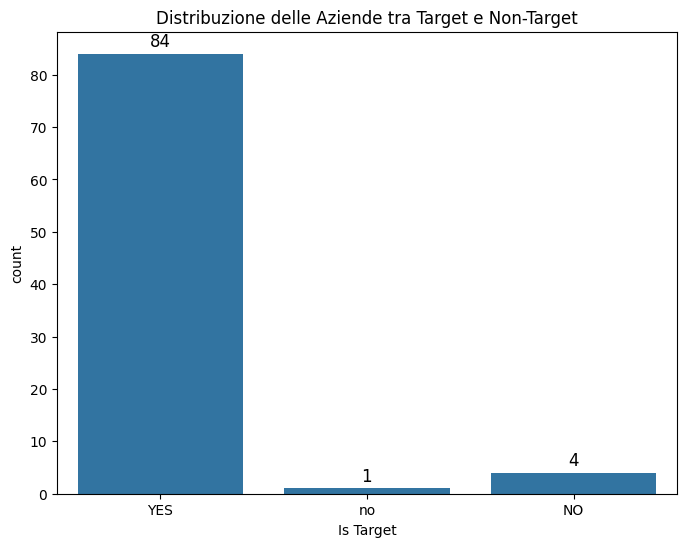

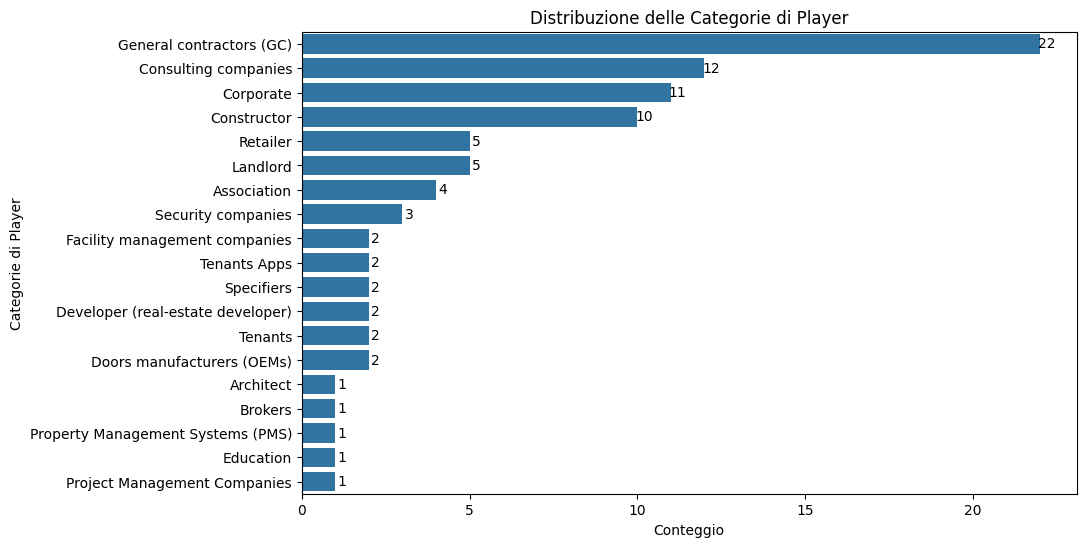

,Contact E-mail,Company / Account,Email Domain,Description,Best Category,Is Target
0,xxxxxxxx@lagardere-tr.es,Lagardere,lagardere-tr.es,Lagardère Travel Retail is one of the four bus...,General contractors (GC),YES
2,xxxxxxxx@asava.es,ASAVA,asava.es,ASAVA is a company specializing in the compreh...,Constructor,YES
4,xxxxxxxx@cepsa.com,Cepsa,cepsa.com,We want to guarantee the energy of today while...,General contractors (GC),YES
7,xxxxxxxx@nhood.com,NHOOD,nhood.com,Noood Do you want to know more? Inauguration o...,Brokers,no
8,xxxxxxxx@grupoyoungretail.com,Young Retail,grupoyoungretail.com,By increasing the brands of the retail sector:...,General contractors (GC),YES
9,xxxxxxxx@lacasadelascarcasas.es,La Casa de las Carcasas,lacasadelascarcasas.es,"Funds for exclusive mobile phones, buy now and...",Doors manufacturers (OEMs),YES
10,xxxxxxxx@grupolar.com,Grupo Lar,grupolar.com,Group Lar we are an international company with...,Association,NO
11,xxxxxxxx@dazia.com,Dazia Capital,dazia.com,I'm sorry.\n\nAI Deduction: Could not infer co...,Retailer,YES
12,xxxxxxxx@cmarsl.com,Ferromave,cmarsl.com,I'm sorry.\n\nAI Deduction: Could not infer co...,Retailer,YES
13,xxxxxxxx@monoma.eu,Monoma,monoma.eu,Together we value your empty money We work clo...,Consulting companies,YES


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
from pathlib import Path

# Funzione per eseguire la classificazione basata su TF-IDF e similarità coseno
def classify_with_cosine_similarity(df_data, df_context):
    # Combina le descrizioni e le note per costruire il vocabolario
    all_texts = df_data['Description'].tolist() + df_context['Notes'].tolist()

    # Creazione della rappresentazione TF-IDF per le descrizioni e le note
    vectorizer = TfidfVectorizer().fit(all_texts)
    company_vectors = vectorizer.transform(df_data['Description'])
    category_vectors = vectorizer.transform(df_context['Notes'])

    best_matches = []
    similarities_matrix = []

    # Calcola la similarità coseno tra ogni descrizione aziendale e le note delle categorie
    for i in tqdm(range(company_vectors.shape[0]), desc="Classificazione", unit="azienda"):
        similarities = cosine_similarity(company_vectors[i], category_vectors)
        similarities_matrix.append(similarities.flatten())  # Appiattisci la matrice delle similarità
        best_match_idx = similarities.argmax()  # Trova l'indice con la similarità massima
        best_category = df_context.iloc[best_match_idx]['Player']  # Ottieni la categoria corrispondente
        best_matches.append(best_category)

    # Assegna la migliore categoria trovata al DataFrame
    df_data['Best Category'] = best_matches
    return df_data, pd.DataFrame(similarities_matrix)

# Funzione per aggiungere la colonna "Best Category" e "Is Target" nel DataFrame
def add_classification_and_target_column(df_data, df_context):
    # Applica la classificazione basata su similarità coseno e ottieni la matrice di similarità
    df_data, similarities_matrix = classify_with_cosine_similarity(df_data, df_context)

    # Creazione della mappa per "Is Target"
    target_map = df_context.set_index('Player')['Is Target'].to_dict()

    # Funzione per verificare se la categoria è un target
    def is_target_category(category):
        return target_map.get(category, "No")  # Restituisce "No" se la categoria non è trovata

    # Aggiunge la colonna "Is Target" in base alla categoria assegnata
    df_data['Is Target'] = df_data['Best Category'].apply(lambda category: is_target_category(category))

    return df_data, similarities_matrix

# Funzione per visualizzare la distribuzione delle categorie (Target vs Non-Target)
def plot_target_distribution(df_data):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='Is Target', data=df_data)
    
    # Aggiungi le etichette sopra ogni barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.title('Distribuzione delle Aziende tra Target e Non-Target')
    plt.show()

# Funzione per visualizzare la distribuzione delle categorie "Player"
def plot_player_distribution(df_data):
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(y='Best Category', data=df_data, order=df_data['Best Category'].value_counts().index)
    
    # Aggiungi etichette sopra ogni barra
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='center', va='center', fontsize=10, color='black', xytext=(5, 0),
                    textcoords='offset points')
    
    plt.title('Distribuzione delle Categorie di Player')
    plt.xlabel("Conteggio")
    plt.ylabel("Categorie di Player")
    plt.show()


def save_to_downloads(df, filename):
    downloads_path = Path.home() / "Downloads"  
    file_path = downloads_path / filename
    df.to_excel(file_path, index=False)
    print(f"File salvato in: {file_path}")

# Applica la classificazione e la verifica del target utilizzando la similarità coseno
df_data_classified_cosinesimilarity, similarities_matrix_cosinesimilarity = add_classification_and_target_column(df_data_with_deduction_description, df_context_cleaned)

save_to_downloads(df_data_classified_cosinesimilarity,"df_data_classified_cosinesimilarity.xlsx")

plot_target_distribution(df_data_classified_cosinesimilarity)
plot_player_distribution(df_data_classified_cosinesimilarity)  

df_data_classified_cosinesimilarity


# **Confronto modelli**

In [ ]:

#data validation
df_data_validation_CHAT=pd.read_excel("https://github.com/sentinel747/Applciation_AIB/raw/refs/heads/main/classified_data_CHAT_Validation.xlsx")

# Confronto Cosine vs CHAT Gpt-40

File salvato in: C:\Users\Andrea\Downloads\metricsCosine_df.xlsx


c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


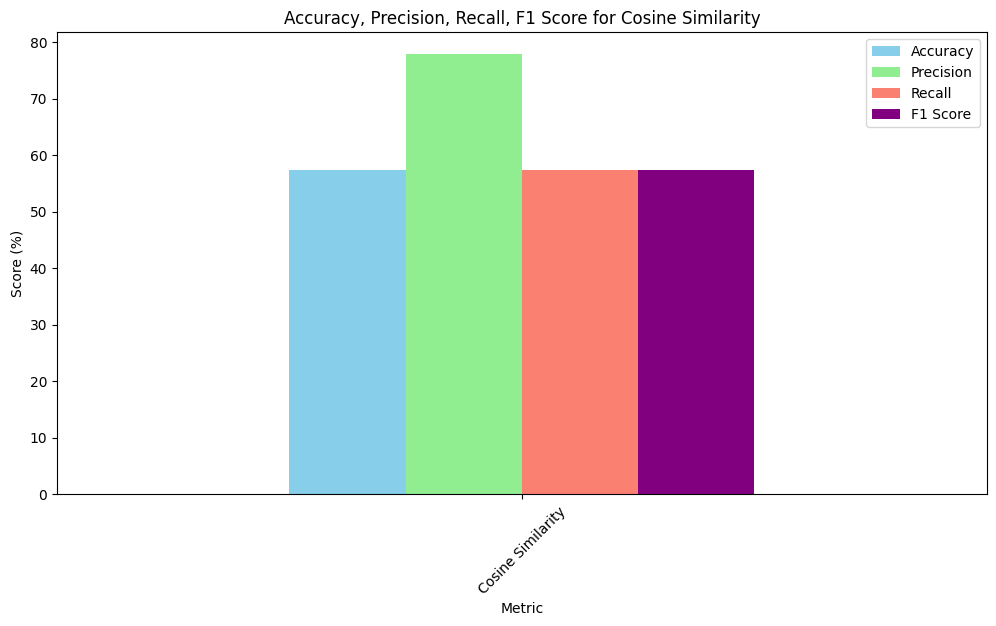

Confusion Matrix for Cosine Similarity:


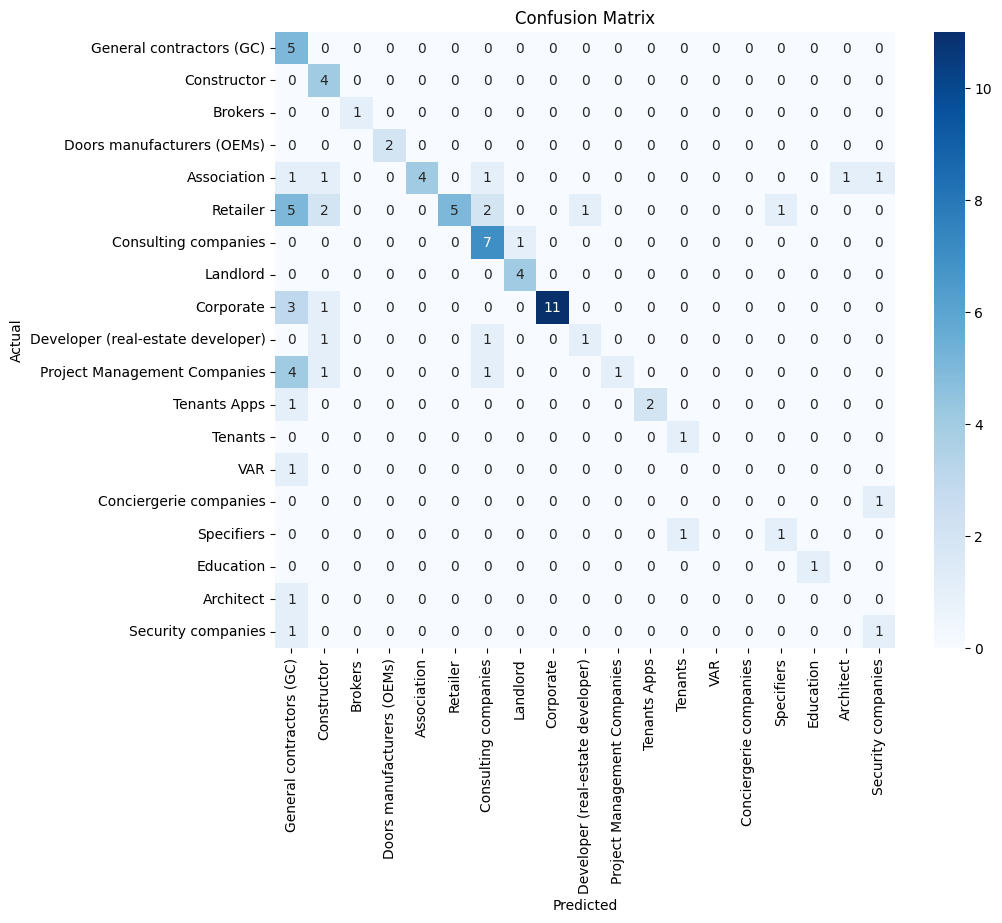

Classification Report for Cosine Similarity:
                                   precision    recall  f1-score   support

                        Architect       0.00      0.00      0.00         1
                      Association       1.00      0.44      0.62         9
                          Brokers       1.00      1.00      1.00         1
           Conciergerie companies       0.00      0.00      0.00         3
                      Constructor       0.40      1.00      0.57         4
             Consulting companies       0.58      0.88      0.70         8
                        Corporate       1.00      0.73      0.85        15
Developer (real-estate developer)       0.50      0.33      0.40         3
       Doors manufacturers (OEMs)       1.00      1.00      1.00         2
                        Education       1.00      1.00      1.00         1
    Facility management companies       0.00      0.00      0.00         0
         General contractors (GC)       0.23      1.00

c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Andrea\text-generation-webui-main\installer_files\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from pathlib import Path

# Funzione per calcolare precision, recall e F1 score
def calculate_metrics(df_data_model, df_data_validation):
    merged_df = df_data_model.merge(df_data_validation[['Email Domain', 'Best Category']],
                                    on='Email Domain', suffixes=('_model', '_validation'))
    y_true = merged_df['Best Category_validation']
    y_pred = merged_df['Best Category_model']
    
    accuracy = accuracy_score(y_true, y_pred) * 100
    precision = precision_score(y_true, y_pred, average='weighted') * 100
    recall = recall_score(y_true, y_pred, average='weighted') * 100
    f1 = f1_score(y_true, y_pred, average='weighted') * 100
    
    return accuracy, precision, recall, f1

# Funzione per visualizzare la confusion matrix
def plot_confusion_matrix(df_data_model, df_data_validation):
    merged_df = df_data_model.merge(df_data_validation[['Email Domain', 'Best Category']],
                                    on='Email Domain', suffixes=('_model', '_validation'))
    y_true = merged_df['Best Category_validation']
    y_pred = merged_df['Best Category_model']
    
    cm = confusion_matrix(y_true, y_pred, labels=merged_df['Best Category_validation'].unique())
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=merged_df['Best Category_validation'].unique(),
                yticklabels=merged_df['Best Category_validation'].unique())
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# Funzione per visualizzare il classification report come testo
def display_classification_report(df_data_model, df_data_validation):
    merged_df = df_data_model.merge(df_data_validation[['Email Domain', 'Best Category']],
                                    on='Email Domain', suffixes=('_model', '_validation'))
    y_true = merged_df['Best Category_validation']
    y_pred = merged_df['Best Category_model']
    report = classification_report(y_true, y_pred)
    print(report)

# Funzione per il grafico di precision, recall, F1 score
def plot_precision_recall_f1(precision_recall_f1_scores):
    metrics_df = pd.DataFrame(precision_recall_f1_scores, index=["Accuracy", "Precision", "Recall", "F1 Score"]).T
    metrics_df.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightgreen', 'salmon', 'purple'])
    plt.title("Accuracy, Precision, Recall, F1 Score for Cosine Similarity")
    plt.xlabel("Metric")
    plt.ylabel("Score (%)")
    plt.xticks(rotation=45)
    plt.legend(loc="upper right")
    plt.show()

# Calcola le metriche per Cosine Similarity
metrics_cosine = calculate_metrics(df_data_classified_cosinesimilarity, df_data_validation_CHAT)

precision_recall_f1_scores = {
    "Cosine Similarity": metrics_cosine,
}

# Funzione per salvare i risultati in Downloads
def save_to_downloads(df, filename):
    downloads_path = Path.home() / "Downloads"  
    file_path = downloads_path / filename
    df.to_excel(file_path, index=False)
    print(f"File salvato in: {file_path}")

metricsCosine_df = pd.DataFrame(precision_recall_f1_scores, index=["Accuracy", "Precision", "Recall", "F1 Score"]).T
save_to_downloads(metricsCosine_df, "metricsCosine_df.xlsx")


plot_precision_recall_f1(precision_recall_f1_scores)

print("Confusion Matrix for Cosine Similarity:")
plot_confusion_matrix(df_data_classified_cosinesimilarity, df_data_validation_CHAT)
print("Classification Report for Cosine Similarity:")
display_classification_report(df_data_classified_cosinesimilarity, df_data_validation_CHAT)
